<a href="https://colab.research.google.com/github/angelinasurachkaryadi/Angelina.S_2209116055-Data-Mining/blob/main/Angelina_S_2209116055_Checkpoint_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPERMARKET SALES**

#**Import Library**

In [69]:
import pandas as pd

In [70]:
import seaborn as sns

In [71]:
import matplotlib as plt

In [72]:
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan dari dataset ini adalah memberikan gamnbaran komprehensif tentang penjualan supermarket menawarkan wawasan tentang perilaku pembelian konsumen,tren produk,dan dinamika ritel.Menganalisis data ini memungkinkan pengecer,pemasar,dan analisis untuk mengoptimalkan strategi,meningkatkan manajemen inventaris,dan meningkatkan pengalaman pelanggan.

##**Assess Situation**

Situasi saat ini menunjukkan bahwa dengan semakin meningkatnya persaingan di industri ritel,pemahaman yang mendalam tentang perilaku konsumen dan tren penjualan menjadi krusial bagi keberhasilan bisnis.Dengan adanya data penjualan Super Market,pelaku industri memiliki kesempatan untuk mengidentifikasi pola pembelian konsumen,menangkap tren produk yang sedang berkembang,dan merespons dinamika pasar dengan lebih cepat dan tepat.

##**Data Mining Goals**

Tujuan dari data mining ini adalah untuk mengidentifikasi pola perilaku konsumen dalam pembelian di Super Market serta menganalisis tren penjualan produk.Dengan begitu,tujuan tersebut dapat mengoptimalkan strategi bisnis,manjemen inventaris,dan pengalaman pelanggan melalui pemahaman yang lebih baik tentang prefensi konsumen dan dinamika pasar.

##**Project Plan**

Proyek ini akan dimulai dengan tahap eksplorasi dan pemahaman data,di mana dataset penjualan super market akan dianalisis secara mendalam untuk mengidentifikasi pola perilaku konsumen dan tren penjualan produk.Selanjutnya mempersiapkan data supaya siap untuk dianalisis agar mengungkap informasi penting tentang perilaku konsumen dan tren ritel.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber data ini dari kaggle,berikut linknya : https://www.kaggle.com/datasets/arunjangir245/super-market-sales

In [73]:
df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


##**Describe Data**

####Informasi Dasar

In [74]:
df.shape

(1000, 17)

Pada dataset supermarket sales memiliki 1000 baris data dan 17 kolom yang menyediakan informasi yang cukup untuk menganalisis tren produk,perilaku pelanggan dan dinamika ritel.Dalam 17 kolom tersebut memiliki informasi berbeda pada setiap kolom.

####Informasi Lanjutan

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Invoice ID** : Kolom Invoice ID untuk pengidentifikasi unik untuk setiap faktur atau transaksi.Memiliki 1000 baris dengan tipe data object yang merujuk pada string atau teks dalam struktur data pandas.


**Branch** : Kolom Branch untuk cabang atau lokasi terjadinya transaksi.Memiliki 1000 baris dengan tipe data object yang merujuk pada string atau teks.


**City** : Kolom City untuk kota dimana tempat cabang berada.Memiliki 1000 baris dengan tipe data object yang merujuk pada string atau teks.


**Customer Type** : Kolom Customer Type untuk menunjukkan apakah pelanggan tersebut merupakan pelanggan tetap atau pelanggan baru.Memiliki 1000 baris dengan tipe data object yang merujuk pada string atau teks.

**Gender** : Memiliki 1000 baris dengan tipe data object atau string yang merepresentasikan jenis kelamin pelanggan.


**Product Line** : Memiliki 1000 baris dengan tipe data object atau string untuk kategori atau jenis produk yang dibeli oleh pelanggan.


**Unit Price** : Kolom Unit Price untuk harga satuan pada produk.Memiliki 1000 baris dengan tipe data float64,ini berarti bahwa nilai-nilai kolom direpresentasikan sebagai floating point numbers atau bilangan pecahan dengan 64-bit.


**Quantity** : Kolom Quantity untuk jumlah unit produk yang dibeli.Memiliki 1000 baris dengan tipe data int64,nilai-nilai pada kolom ini adalah bilangan bulat atau integer yang diwakili dalam format 64-bit.

**Tax 5%** : Kolom ini untuk jumlah pajak (5% dari total biaya) yang dikenakan pada setiap transaksi.Memiliki 1000 baris dengan tipe data float64,ini berarti nilai-nilai kolom disimpan adalah nilai numerik(desimal) dan dapat berupa bilangan pecahan atau bulat.


**Total** : Kolom Total untuk total biaya transaksi termasuk pajak.Memiliki 1000 baris dengan tipe data float64,berarti nilai-nilai kolom disimpan adalah nilai bilangan pecahan dengan presisi 64-bit dalam representasi biner.


**Date** : Kolom Date untuk tanggal terjadinya transaksi.Memiliki 1000 baris dengan tipe data object atau string yang merujuk pada string atau teks.


**Time** : Kolom ini untuk waktu terjadinya transaksi.Memiliki 1000 baris dengan tipe data object atau string yang merujuk pada string atau teks.


**Payment** : Kolom Payment untuk Metode pembayaran yang digunakan seperti kartu kredit atau tunai.Memiliki 1000 baris dengan tipe data object atau string yang merujuk pada string atau teks.


**Cogs** : Kolom Cogs (Cost of Goods Sold) ini untuk biaya langsung yang terkait dengan produksi atau pembelian produk yang dijual.Memiliki 1000 baris dengan tipe data float64,ini berarti nilai-nilai kolom disimpan adalah angka desimal dengan presisi ganda menggunakan 64-bit.

**Gross Margin Pertcentage** : Kolom ini untuk Presentase margin keuntungan untuk transaksi.Memiliki 1000 baris dengan tipe data float64,ini berarti nilai-nilai kolom disimpan adalah angka desimal.


**Gross Income** : Kolom Gross Income(pendapatan kotor) untuk total keuntungan yang diperoleh dari transaksi.Memiliki 1000 baris dengan tipe data float64,nilai-nilai kolom disimpan adalah bilangan pecahan dengan presisi 64-bit dan bisa juga memiliki bagian desimal.


**Rating** : Kolom ini untuk peringkat kepuasan pelanggan atau umpan balik atas transaksi.emiliki 1000 baris dengan tipe data float64,nilai-nilai kolom disimpan dapat memiliki nilai desimal.







####Informasi Statistik Deskriptif

In [76]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


**Unit Price**

Rata -rata harga satuan adalah 55.67 , dengan harga deviasi sekitar 26.49 , Harga minimum sekitar 10.08 dan harga maksimum sekitar 99.96


**Quantity**

Rata -rata jumlah yang dibeli adalah 5.51 , dengan nilai deviasi sekitar 2.92  , jumlah produk yang terjual minimum sekitar 1 dan maksimumnya adalah 10.


**Tax 5%**

Pajak rata-rata adalah 15.38 dengan standar deviasi 11.7 , pajak berkisar dari 0.51 hinggan 49.65

**Total**

Rata-rata total pembelian adalah 322.97 dengan standar deviasi 245.89.Minimum total pembelian adalah 10.68 dan maksimum adalah 1042.65


**COGS**

Rata-rata cogs adalah 307.59 dengan standar deviasi sekitar 234.18 , cogs minimum 10.17 dan maksimum sekitar 993.00


**Gross Margin Percentage**

Nilainya tetap adalah 4.76% untuk semua transaksi,menunjukkan margin kotor yang tetap.Toko memiliki kebijakan harga yang konsisten.


**Gross Income**

Rata-rata pendapatan kotor adalah 15.38 dengan standar deviasi 11.71 , minimum nya adalah 0.51 dan maksimum adalah 49.65


**Rating**

Rata-rata pada rating adalah 6.97 dengan standar deviasi 1.72 , nilai minimum pada rating adalah 4.0 dan maksimum adalah 10.0



##**Exploratory Data Analysis**

<Axes: >

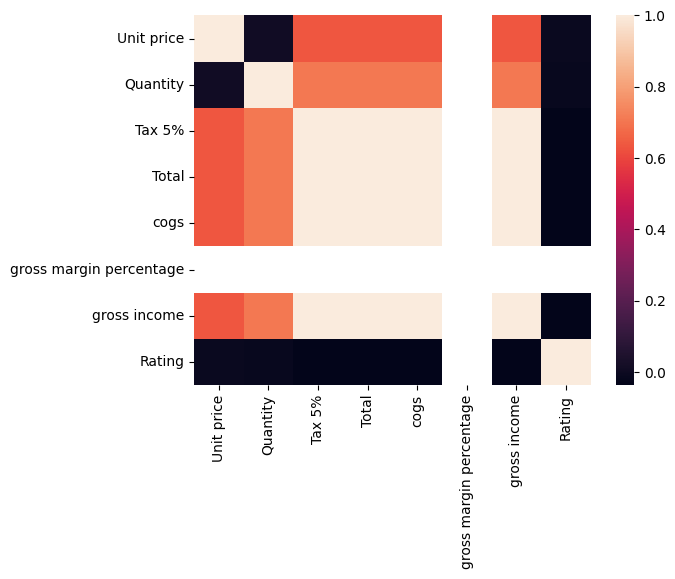

In [77]:
#Korelasi Pearson
sns.heatmap(df.corr(numeric_only=True))

Kolerasi Pearson adalah metrik statistik yang mengukur seberapa erat hubungan linear antar dua variabel numerik.Nilai kolerasi berada dalam rentang -1 hingga 1.heatmap tersebut memberikan informasi tentang seberapa erat hubungan linear antara unit price,quantity,tax 5%,cogs,gross margin precentage,gross income,dan rating.

In [78]:
#Kolerasi Kendall
df.corr(numeric_only=True, method='kendall')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.007630,0.465191,0.465191,0.465191,NaN,0.465191,-0.005896
Quantity,0.007630,1.000000,0.571445,0.571445,0.571445,NaN,0.571445,-0.010218
Tax 5%,0.465191,0.571445,1.000000,1.000000,1.000000,NaN,1.000000,-0.010785
Total,0.465191,0.571445,1.000000,1.000000,1.000000,NaN,1.000000,-0.010785
cogs,0.465191,0.571445,1.000000,1.000000,1.000000,NaN,1.000000,-0.010785
gross margin percentage,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
gross income,0.465191,0.571445,1.000000,1.000000,1.000000,NaN,1.000000,-0.010785
Rating,-0.005896,-0.010218,-0.010785,-0.010785,-0.010785,NaN,-0.010785,1.000000


**Unit price dan quantity** : kolerasi antara harga unit dan jumlah barang yang dibeli adalah sangat rendah,yaitu sekitar 0.0076.menunjukkan bahwa tidak ada hubungan monotik yang kuat antara harga unit dan jumlah barang yang dibeli.


**Unit price dan Tax 5%** : Kolerasi antara harga unit dan Tax 5% adalah cukup kuat yautu sekitar 0.4652.menunjukkan bahwa ada hubungan monotik yang moderat antara harga unit dan Tax 5%.


**Unit price dan Total** : Kolerasi antara harga unit dan total adalah cukup kuat yaitu sekitar 0.4652.menunjukkan bahwa ada hubungan monotik yang moderat antara harga unit dan total.


**Unit price dan cogs** : Kolerasi antara harga unit dan cogs adalah cukup kuat yaitu sekitar 0.4652.menunjukkan bahwa ada hubungan monotik yang moderat antara harga unit dan cogs.


**Unit Price dan gross income** : Kolerasi antara harga unit dan gross income adalah cukup kuat yaitu sekitar 0.4652.menunjukkan bahwa ada hubungan monotik yang moderat antara harga unit dan gross income.


**Unit Price dan Rating** : Kolerasi negatif yang sangat lemah antara harga unit dan rating.menunjukkan bahwa tidak ada hubungan yang jelas antara harga unit dan rating.


**Quantity dan tax 5%** : Kolerasi antara quantity dan tax 5% cukup kuat sekitar 0.5714.


**Quantity dan total** : Kolerasi antara quantity dan total cukup kuat sekitar 0.5714 menunjukkan bahwa ada hubungan monotik yang moderat antara quantity dan total.


**Quantity dan cogs** : Kolerasi antara quantity dan cogs adalah cukup kuat sekitar 0.5714


**Quantity dan gross income** : Kolerasi antara quantity dan gross income adalah sangat kuat sekitar 1 menunjukkan bahwa ada hubungan yang kuat antara quantity dan gross income.


**Tax 5% dan total** : Kolerasi antara tax 5% dan total sangat kuat yaitu sekitar 1.


**Tax 5% dan cogs** : Kolerasi antara tax 5% dan cogs sangat kuat yaitu sekitar 1.


**Tax 5% dan gross income** : Kolerasi antara tax 5% dan gross income sangat kuat yaitu 1.


**Total dan cogs** : Kolerasi antara total dan cogs sangat kuat yaitu 1 menunjukkan bahwa hubungan antara total dan cogs sangat kuat.


**Total dan gross income** : Kolerasi total dan gross income adalah sangat kuat sekitar 1.


**Cogs dan gross income** : Kolerasi antara cogs dan gross income sangat kuat yaitu 1.


**Rating** : Kolerasi antara rating dan yang lainnya adalah sangat rendah mendekati nol.

In [79]:
#Kolerasi Spearmen
df.corr(numeric_only=True, method='spearman')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.011167,0.630054,0.630054,0.630054,NaN,0.630054,-0.008335
Quantity,0.011167,1.000000,0.735265,0.735265,0.735265,NaN,0.735265,-0.015453
Tax 5%,0.630054,0.735265,1.000000,1.000000,1.000000,NaN,1.000000,-0.017226
Total,0.630054,0.735265,1.000000,1.000000,1.000000,NaN,1.000000,-0.017226
cogs,0.630054,0.735265,1.000000,1.000000,1.000000,NaN,1.000000,-0.017226
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.630054,0.735265,1.000000,1.000000,1.000000,NaN,1.000000,-0.017226
Rating,-0.008335,-0.015453,-0.017226,-0.017226,-0.017226,NaN,-0.017226,1.000000


**Unit price dan Quantity** : Kolerasi antara unit price dan quantity sangat rendah sekitar 0.0112.


**Unit price dan Tax 5%** : Kolerasi antara unit price dan tax 5% cukup kuat yaitu sekitar 0.6301


**Unit price dan Total** : Kolerasi antara unit price dan total cukup kuat sekitar 0.6301


**Unit price dan cogs** : Kolerasi antara unit price dan cogs cukup kuat yaitu 0.6301


**Unit price dan Gross Income** : Kolerasi antara unit price dan gross income adalah cukup kuat yaitu 0.6301


**Quantity dan Tax 5%** : Kolerasi antara quantity dan tax 5% adalah cukup kuat yaitu sekitar 0.7353


**Quantity dan Total** : Kolerasi antara quantity dan total adalah cukup kuat yaitu 0.7353


**Quantity dan cogs** : Kolerasi antara quantity dan cogs adalah cukup kuat yaitu 0.7353


**Quantity dan gross income** : Kolerasi antara quantity dan gross income adalah cukup kuat yaitu 0.7353


**Tax 5% dan total** : Kolerasi antara tax 5% dan total adalah sangat kuat yaitu sekitar 1.


**Tax 5% dan cogs** :Kolerasi antara tax 5% dan cogs adalah sangat kuat yaitu sekitar 1.


**Tax 5% dan gross income** : Kolerasi antara tax 5% dan gross income adalah sangat kuat yaitu 1


**Total dan cogs** : Kolerasi antara total dan cogs adalah sangat kuat yaitu 1.


**Total dan gross income** : Kolerasi antara total dan gross income adalah sangat kuat sekitar 1


**Cogs dan gross income** : Kolerasi antara cogs dan gross income adalah sangat kuat yaitu 1.


**Rating** : Kolerasi antara rating dan lainnya sangat rendah mendekati nol.

In [80]:
product_line_counts = df['Product line'].value_counts()

<Axes: ylabel='Product line'>

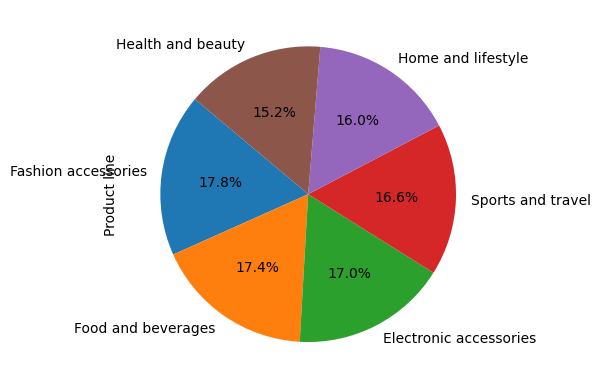

In [81]:
product_line_counts.plot(kind='pie',
                   autopct='%1.1f%%',
                   startangle=140)

**Health dan Beauty** : kategori ini berkisar 15.2% mencakup produk-produk seperti perawatan kulit,produk kecantikan dan peralatan kesehatan.


**Home dan Lifestyle** : kategori ini berkisar 16.0% mencakup produk-produk seperti dekorasi rumah dan peralatan rumah tangga.


**Sports dan Travel** : kategori ini berkisar 16.6% mencakup produk-produk seperti peralatan olahraga,perlengkapan perjalanan dan barang terkait liburan maupun aktivitas outdoor.



**Electronic Accessories** : kategori ini berkisar 17.0% mencakup produk-produk seperti kabel,charger,earphone dan lain-lain.


**Food dan Beverages** : kategori ini berkisar 17.4% mencakup produk-produk seperti makanan ringan,minuman kaleng dan bahan makanan pokok.


**Fashion Accessories** : kategori ini berkisar 17.8% mencakup produk-produk seperti perhiasan,kacamata,tas dan topi.




In [82]:
gender_counts = df['Gender'].value_counts()

<Axes: ylabel='Gender'>

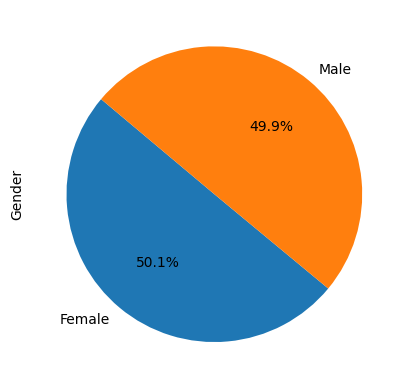

In [83]:
gender_counts.plot(kind='pie',
                   autopct='%1.1f%%',
                   startangle=140)

Dalam gender perempuan berkisar 50.1% sedangkan laki-laki 49.9%

<Axes: xlabel='Payment', ylabel='Count'>

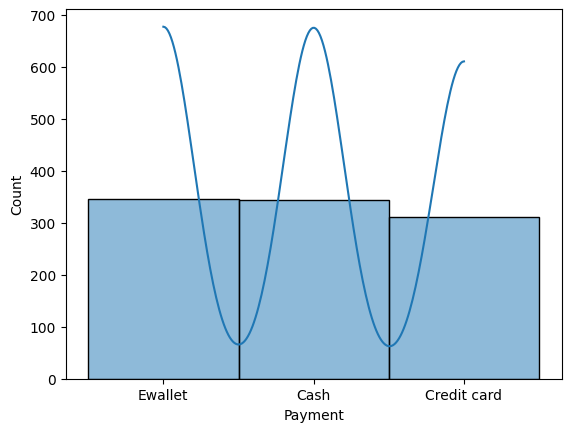

In [84]:
sns.histplot(df['Payment'].dropna(), bins=10, kde=True)

Dalam Payment Ewallet dan Cash Payment sangat tidak berbeda jauh dibandingkan credit card.Berarti pelanggan lebih banyak menggunakan pembayaran ewallet dan cash.

<ipython-input-85-5127f288a0f7>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Quantity', ylabel='count'>

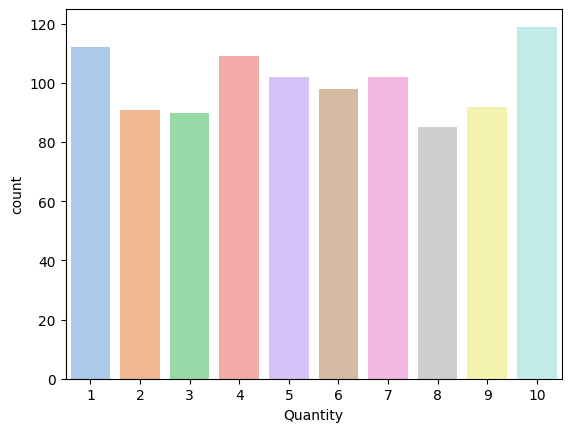

In [85]:
sns.countplot(x='Quantity', data=df, palette='pastel')

Pada Quantity (jumlah unit produk yang dibeli) pelanggan lebih banyak membeli jumlah unit produk sebanyak 10 produk,sedangkan sedikit pelanggan yang membeli 8 produk.

Pada setiap kolom tidak ada nilai null

##**Verify Data Quality**

####Missing Values

In [86]:
missing_values = df.isnull().sum()

In [87]:
missing_values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Pada setiap kolom tidak ada nilai null(missing values).ini merupakan indikasi yang baik karena data yang bersih dan lengkap memudahkan dalam analisis selanjutnya.

####Outliers Values

In [88]:
def detect_outliers_iqr(column):
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return outliers
    else:
        return pd.Series([])

In [89]:
print("\nOutliers pada kolom numerik:")
for column in df.select_dtypes(include=['float64', 'int64','object']).columns:
    outliers = detect_outliers_iqr(df[column])
    if not outliers.empty:
        print(f"Outliers pada kolom '{column}':")
        print(outliers)
    else:
        print(f"Tidak ada outliers pada kolom '{column}'.")


Outliers pada kolom numerik:
Tidak ada outliers pada kolom 'Invoice ID'.
Tidak ada outliers pada kolom 'Branch'.
Tidak ada outliers pada kolom 'City'.
Tidak ada outliers pada kolom 'Customer type'.
Tidak ada outliers pada kolom 'Gender'.
Tidak ada outliers pada kolom 'Product line'.
Tidak ada outliers pada kolom 'Unit price'.
Tidak ada outliers pada kolom 'Quantity'.
Outliers pada kolom 'Tax 5%':
166    47.790
167    49.490
350    49.650
357    47.720
422    48.605
557    49.260
699    48.750
792    48.685
996    48.690
Name: Tax 5%, dtype: float64
Outliers pada kolom 'Total':
166    1003.590
167    1039.290
350    1042.650
357    1002.120
422    1020.705
557    1034.460
699    1023.750
792    1022.385
996    1022.490
Name: Total, dtype: float64
Tidak ada outliers pada kolom 'Date'.
Tidak ada outliers pada kolom 'Time'.
Tidak ada outliers pada kolom 'Payment'.
Outliers pada kolom 'cogs':
166    955.8
167    989.8
350    993.0
357    954.4
422    972.1
557    985.2
699    975.0
792    

<ipython-input-88-c3d51f5d6156>:11: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

<ipython-input-88-c3d51f5d6156>:11: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Gross Margin Percentage,dan Ratings tidak ada outliers karena sebagian besar berisi data kategorikal atau string.


Tax 5%,Total,Gross Income dan cogs memiliki outliers hal ini menunjukkan adanya transaksi yang memiliki nilai yang jauh lebih tinggi atau lebih rendah dari kebanyakan transaksi lainnya.

####Duplicated Values

In [90]:
duplicated_values = df[df.duplicated()]

In [91]:
print("\nNilai yang duplikat:")
print(duplicated_values)


Nilai yang duplikat:
Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []


Semua kolom tidak ada nilai duplikat


####Inconsistent Values / Noise (Optional)

In [92]:
def detect_noise(column):
    unique_values = df[column].unique()
    inconsistent_values = []
    for value in unique_values:
        if isinstance(value, str):
            if not value.isalnum():
                inconsistent_values.append(value)

    return inconsistent_values

In [93]:
noise_per_column = {}
for column in df.columns:
    noise_per_column[column] = detect_noise(column)

In [94]:
for column, noise in noise_per_column.items():
    if noise:
        print(f"Kolom '{column}': Terdapat nilai noise/inconsistent: {noise}")
    else:
        print(f"Kolom '{column}': Tidak ada nilai noise/inconsistent.")

Kolom 'Invoice ID': Terdapat nilai noise/inconsistent: ['750-67-8428', '226-31-3081', '631-41-3108', '123-19-1176', '373-73-7910', '699-14-3026', '355-53-5943', '315-22-5665', '665-32-9167', '692-92-5582', '351-62-0822', '529-56-3974', '365-64-0515', '252-56-2699', '829-34-3910', '299-46-1805', '656-95-9349', '765-26-6951', '329-62-1586', '319-50-3348', '300-71-4605', '371-85-5789', '273-16-6619', '636-48-8204', '549-59-1358', '227-03-5010', '649-29-6775', '189-17-4241', '145-94-9061', '848-62-7243', '871-79-8483', '149-71-6266', '640-49-2076', '595-11-5460', '183-56-6882', '232-16-2483', '129-29-8530', '272-65-1806', '333-73-7901', '777-82-7220', '280-35-5823', '554-53-8700', '354-25-5821', '228-96-1411', '617-15-4209', '132-32-9879', '370-41-7321', '727-46-3608', '669-54-1719', '574-22-5561', '326-78-5178', '162-48-8011', '616-24-2851', '778-71-5554', '242-55-6721', '399-46-5918', '106-35-6779', '635-40-6220', '817-48-8732', '120-06-4233', '285-68-5083', '803-83-5989', '347-34-2234',

Kolom Invoice ID,Product Line,Date,Time,Payment memiliki nilai noise atau inconsistent

sedangkan Baranch,City,Customer Type,Gender,Unit Price,,Quantity,Tax 5%,Total,Cogs,Gross Margin Percentage,Gross Income,dan Rating tidak memiliki nilai noise atau inconsistent

# **Data Cleaning**


### **Penanganan Missing Values**

#####**Pengecekan Missing Values**

In [95]:
print((df.isna().sum() / len(df)) * 100)

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64


Bisa dilihat diatas,bahwa tidak ada nilai yang hilang.Karena semua kolom memiliki nilai 0.0 yang berarti tidak perlu melakukan hapus dan imputasi missing values

### **Penanganan Duplicated Values**

**Pengecekan Nilai Duplikat**

In [96]:
df[df.duplicated()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


Pada semua kolom tidak ada nilai duplikat,yang berarti tidak perlu melakukan penghapusan nilai duplikat

### **Penanganan Outliers**

#####**Pengecekan Outliers**

In [97]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Unit price,0.0
Quantity,0.0
Tax 5%,0.9
Total,0.9
cogs,0.9
gross margin percentage,0.0
gross income,0.9
Rating,0.0


Pada kolom Tax 5%,Total,cogs,dan gross income memiliki nilai outliers yaitu 0.9 sedangkan Unit price,Quantity,gross margin percentage,dan Rating tidak memiliki nilai outliers yaitu 0.0

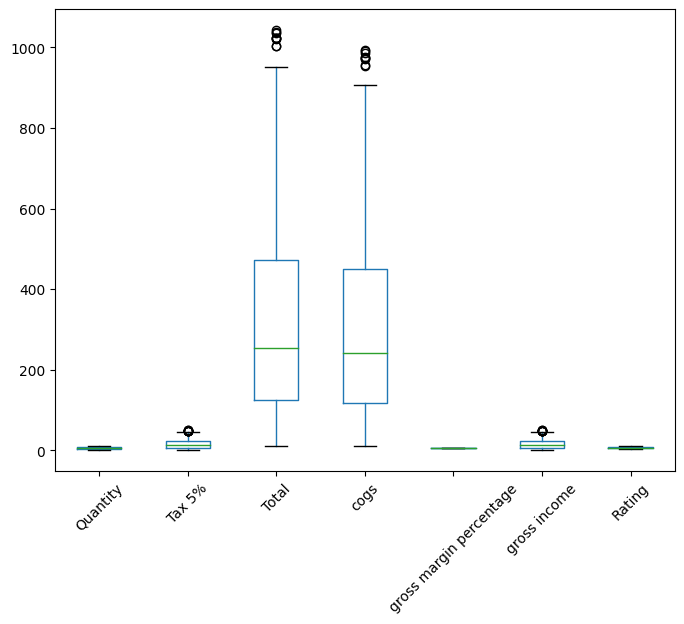

In [98]:
boxplot = df.drop('Unit price', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

##### **Hapus Outliers**

In [99]:
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Total'] >= lower_bound) & (df['Total'] <= upper_bound)]

In [100]:
Q1 = df['cogs'].quantile(0.25)
Q3 = df['cogs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['cogs'] >= lower_bound) & (df['cogs'] <= upper_bound)]

Melakukan penghapusan outliers pada kolom Total dan cogs.

##### **Pengecekan Ulang**

In [101]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Unit price,0.0
Quantity,0.0
Tax 5%,0.0
Total,0.0
cogs,0.0
gross margin percentage,0.0
gross income,0.0
Rating,0.0


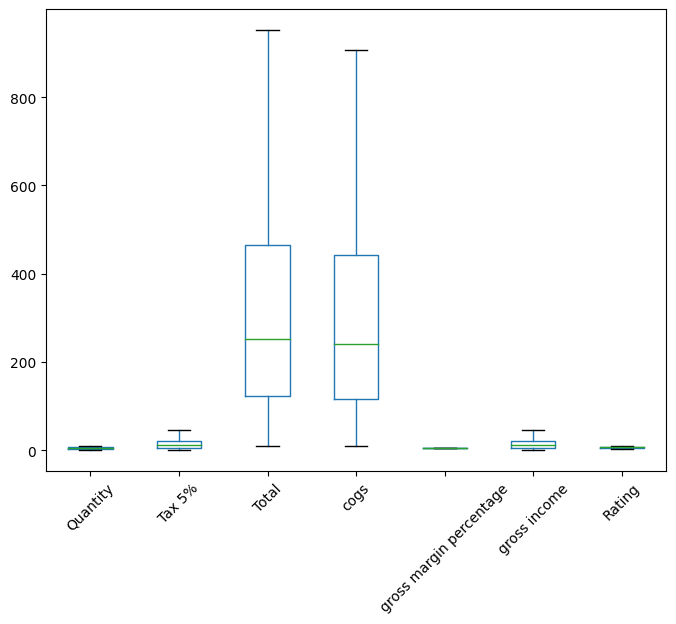

In [11]:
boxplot = df.drop('Unit price', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

# **Construct Data**

### **Melakukan Rekayasa Fitur (Feature Engineering)**

In [66]:
def categorize_rating(rating):
    if rating < 4:
        return 'Low'
    elif 3 <= rating < 6:
        return 'Medium'
    else:
        return 'High'

df['Rating Category'] = df['Rating'].apply(categorize_rating)


In [60]:
df.head()

,Customer type,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Invoice ID_101-17-6199,...,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Cash,Payment_Credit card,Payment_Ewallet,Rating Category_High,Rating Category_Medium,Rating Category
0,1,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,0,...,0,0,0,0,0,0,1,1,0,High
1,0,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,0,...,0,0,0,0,1,0,0,1,0,High
2,0,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,0,...,0,0,0,0,0,1,0,1,0,High
3,1,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,0,...,0,0,0,0,0,0,1,1,0,High
4,0,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,0,...,0,0,0,0,0,0,1,0,1,Medium


Membuat kolom baru yaitu "Rating Category" untuk mengkategorikan nilai rating kedalam tiga kategori yang berbeda seperti "High","Medium",dan "Low".

# **Data Reduction**

### **Mengurangi Fitur-Fitur yang Kurang Relavan**

In [104]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [105]:
df = df.drop(['Branch','City'], axis=1)

In [106]:
df.head()

,Invoice ID,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Fitur - fitur yang kurang relevan adalah branch dan city karena tidak selalu relavan pada analisis penjualan maupun karakteristik pelanggan

# **Data Transformation**

##### **Mapping**

In [41]:
df['Customer type'] = df['Customer type'].map({'Normal': 0, 'Member': 1}).astype(int)

In [52]:
df

,Customer type,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Invoice ID_101-17-6199,...,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Cash,Payment_Credit card,Payment_Ewallet,Rating Category_High,Rating Category_Medium
0,1,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,0,...,0,0,0,0,0,0,0,1,1,0
1,0,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,0,...,0,0,0,0,0,1,0,0,1,0
2,0,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,0,...,0,0,0,0,0,0,1,0,1,0
3,1,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,0,...,0,0,0,0,0,0,0,1,1,0
4,0,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2,0,...,0,0,0,0,0,0,0,1,1,0
996,0,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4,0,...,0,0,0,0,0,0,0,1,0,1
997,1,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7,0,...,0,0,0,0,0,1,0,0,1,0
998,0,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1,0,...,0,0,0,0,0,1,0,0,0,1


Membuat kolom Customer type yang awalnya nilai kategorikal menjadi kolom numerikal Normal itu 0 dan Member itu 1

##### **Enconding**

In [46]:
df = pd.get_dummies(df)

In [47]:
df.head()

,Customer type,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Invoice ID_101-17-6199,...,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Cash,Payment_Credit card,Payment_Ewallet,Rating Category_High,Rating Category_Medium
0,1,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,0,...,0,0,0,0,0,0,0,1,1,0
1,0,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,0,...,0,0,0,0,0,1,0,0,1,0
2,0,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,0,...,0,0,0,0,0,0,1,0,1,0
3,1,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,0,...,0,0,0,0,0,0,0,1,1,0
4,0,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,0,...,0,0,0,0,0,0,0,1,0,1


Melakukan proses yang disebut one-hot enconding pada dataframe

In [103]:
df.to_csv('Data Cleaned.csv',index=False)